In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#!pip install seaborn

In [3]:
university=pd.read_csv('universities_data.csv')

## #Remame the colnums

In [4]:
colRename={"Name":"University_name","Applicants total":'App_total',
"Admissions total":'Admi_total',
"Enrolled total":'Enroll_total',
"Number of students receiving an Associate's degree":'NoStudRecAssDegree',
"Number of students receiving a Bachelor's degree":'NoStudRecBachDegree',
"Number of students receiving a Master's degree":'NoStudRecMasterDegree',
"Number of students receiving a Doctor's degree":'NoStudRecDocterDegree',
"Number of students receiving a certificate of less than 1-year":'NOStudfor1yrCerti',
"Number of students receiving a certificate of 1 but less than 4-years":'NoOfStudLess4Certi',
"Number of students receiving a Postbaccalaureate or Post-master's certificate":'NoStudPostMasterCerti',
"Percent admitted - total":'PercentAdmitted-total',
"Admissions yield - total":'AdmissionsYield-total',
"Tuition and fees, 2010-11":'Tuition&fees-2010-11',
"Tuition and fees, 2011-12":'Tuition&fees-2011-12',
"Tuition and fees, 2012-13":'Tuition&fees-2012-13',
"Tuition and fees, 2013-14":'Tuition&fees-2013-14',
"Total price for in-state students living on campus 2013-14":'totalPriceInStateStud2013-14',
"Total price for out-of-state students living on campus 2013-14":'totalPriceOutStateStud2013-14',
"State abbreviation":'State_abbreviation',
"Graduation rate - Bachelor degree within 4 years, total":'Graduation%within4yrBachlor',
"Percent of freshmen receiving any financial aid":'PFRecAnyFinancialAid',
"Percent of freshmen receiving student loan aid":'StudLoan',
"Percent of freshmen receiving federal student loans":'RecAnyFederalLoan',
"Percent of freshmen receiving other loan aid":'AnyotherLoan',
"Total enrollment":'TotalEnrollment'}

In [5]:
university.rename(columns=colRename,inplace=True)
df1=university[colRename.values()]

In [6]:
['Highest degree offered',
'Sector of institution',
'Level of institution',
'Control of institution',
'Full-time enrollment',
'Part-time enrollment',
'Undergraduate enrollment',
'Graduate enrollment']

['Highest degree offered',
 'Sector of institution',
 'Level of institution',
 'Control of institution',
 'Full-time enrollment',
 'Part-time enrollment',
 'Undergraduate enrollment',
 'Graduate enrollment']

In [7]:
for col in university.columns:
    print(col)

ID number
University_name
year
ZIP code
Highest degree offered
County name
Longitude location of institution
Latitude location of institution
Religious affiliation
Offers Less than one year certificate
Offers One but less than two years certificate
Offers Associate's degree
Offers Two but less than 4 years certificate
Offers Bachelor's degree
Offers Postbaccalaureate certificate
Offers Master's degree
Offers Post-master's certificate
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Offers Doctor's degree - other
Offers Other degree
App_total
Admi_total
Enroll_total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
SAT Critical Reading 25th percentile score
SAT Critical Reading 75th percentile score
SAT Math 25th percentile score
SAT Math 75th percentile score
SAT Writing 25th percentile score
SAT Writing 75th percentile score
ACT Composite 25th percentile score
ACT Composite 75th percentile score
Estimated en

In [8]:
dict1=df1.isna().sum().to_dict()

In [9]:
nulldf=pd.DataFrame({'col':dict1.keys(),'count':dict1.values()})

## #NUll values form the selected features

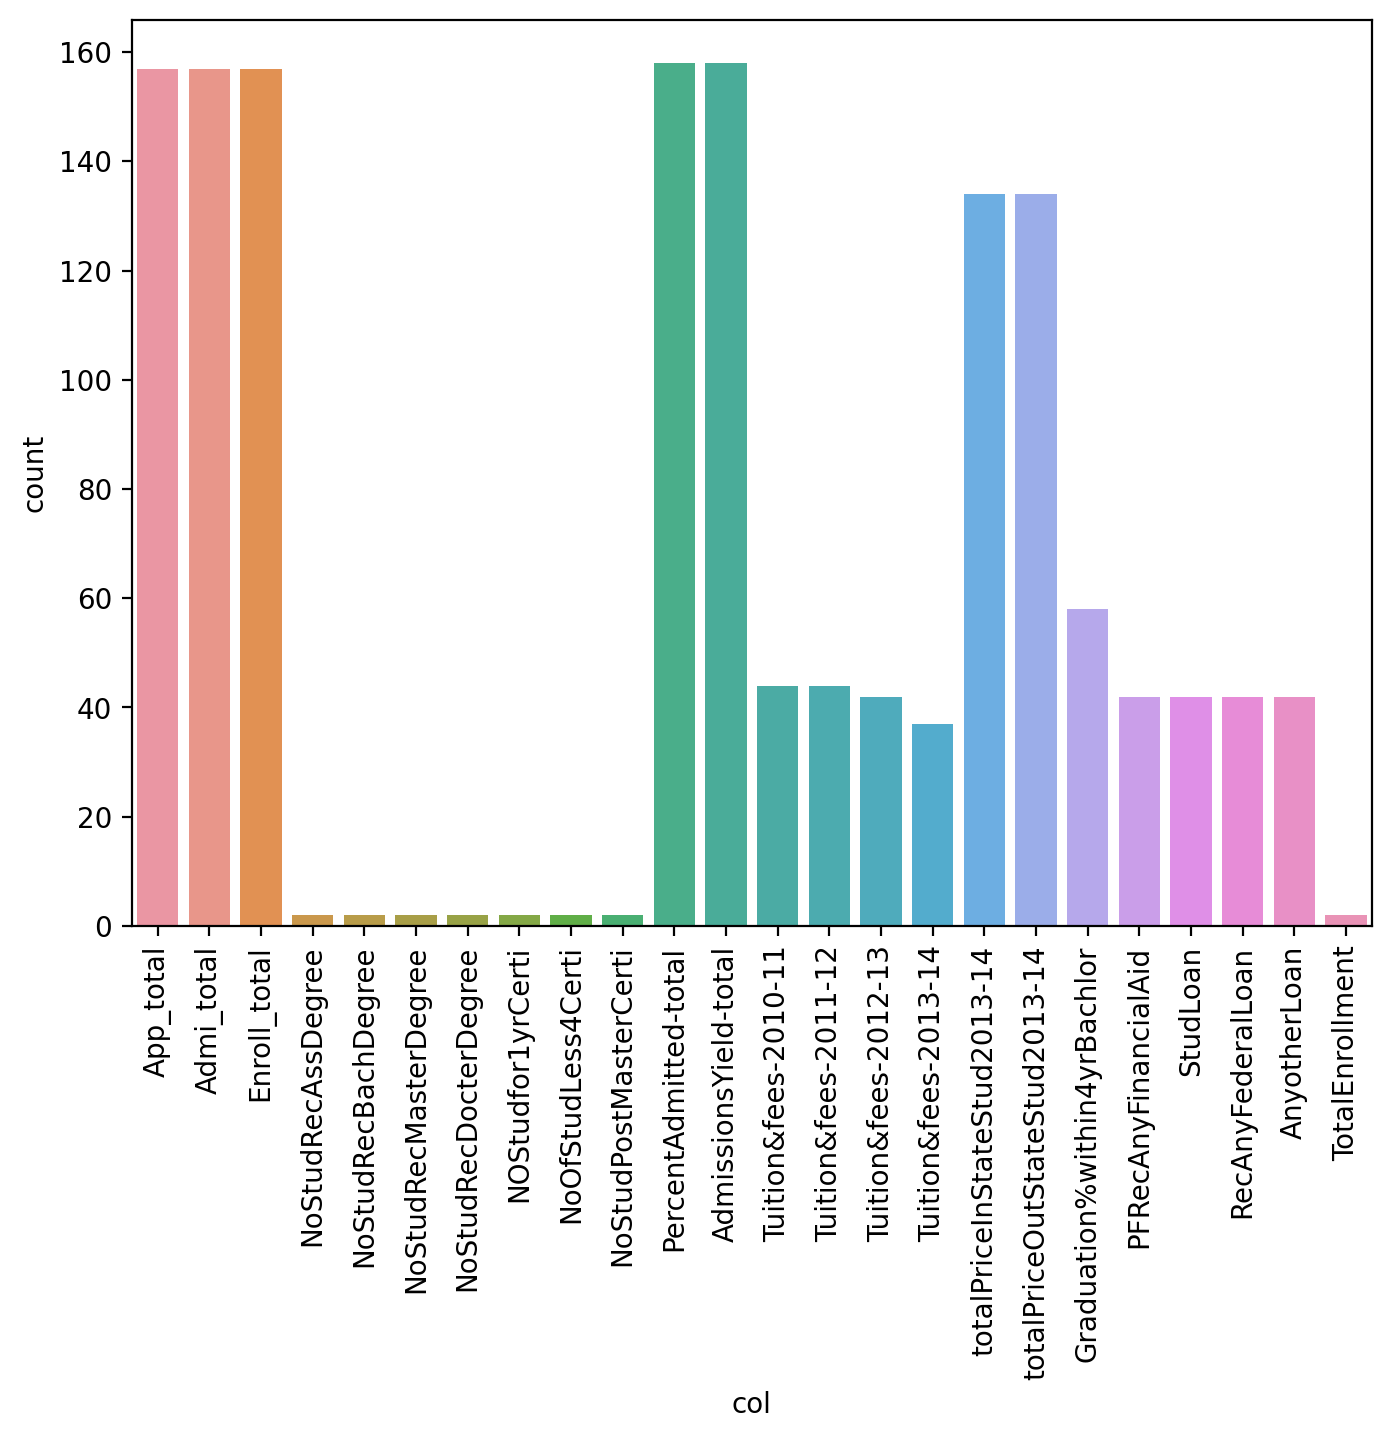

In [10]:
plt.figure(figsize=(8,6),dpi=200)
sns.barplot(data=nulldf[nulldf['count']>0],x='col',y='count')
plt.xticks(rotation=90)
plt.show()

## #Feature Engineering

In [11]:
#Let drop the rows which columns has only few values are null(e.g no.of rows=2)
col1=list(nulldf['col'].values)
newDf=university[col1]

In [12]:
newDf[['Highest degree offered',
'Sector of institution',
'Level of institution',
'Control of institution',
'Full-time enrollment',
'Part-time enrollment',
'Undergraduate enrollment',
'Graduate enrollment']]=university[['Highest degree offered',
'Sector of institution',
'Level of institution',
'Control of institution',
'Full-time enrollment',
'Part-time enrollment',
'Undergraduate enrollment',
'Graduate enrollment']]

C:\Users\lenovo\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
newDf['State_abbreviation'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
#Drop Duplicates 
newDf.drop_duplicates(inplace=True)

C:\Users\lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## #Drop Null values

In [15]:
newDf.dropna(subset=['App_total','Admi_total','Enroll_total','Graduation%within4yrBachlor','totalPriceInStateStud2013-14'],axis=0,thresh=4,inplace=True)

C:\Users\lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
newDf.dropna(inplace=True)

C:\Users\lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## #What will be a likely enrollment rate?

In [17]:
newDf['Enrollment_Rate']=newDf['Enroll_total']/newDf['Admi_total']*100

C:\Users\lenovo\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
newDf[['University_name','Enrollment_Rate']].sort_values('Enrollment_Rate',ascending=False)

,University_name,Enrollment_Rate
690,College of the Ozarks,91.304348
475,Southern University at New Orleans,89.528796
40,University of Arkansas at Little Rock,87.647832
204,Florida College,87.111111
682,Missouri Valley College,86.458333
...,...,...
1080,Drexel University,8.488064
1374,Mary Baldwin College,7.988274
1011,Wilberforce University,7.709497
736,New England College,7.535444


## #What will be a likely graduation rate?

In [19]:
newDf[['University_name','Graduation%within4yrBachlor']].sort_values('Graduation%within4yrBachlor',ascending=False)

,University_name,Graduation%within4yrBachlor
124,Pomona College,93.0
1092,Haverford College,91.0
909,Davidson College,90.0
367,University of Notre Dame,90.0
816,Hamilton College,90.0
...,...,...
199,Edward Waters College,1.0
1018,Bacone College,0.0
559,Northeastern University,0.0
1340,Burlington College,0.0


## #Which are the most lucrative colleges for students in terms of pass rate and cost?

In [20]:
newDf[['University_name','Enrollment_Rate','totalPriceInStateStud2013-14']].sort_values(['Enrollment_Rate'],ascending=False)

,University_name,Enrollment_Rate,totalPriceInStateStud2013-14
690,College of the Ozarks,91.304348,27276.0
475,Southern University at New Orleans,89.528796,16191.0
40,University of Arkansas at Little Rock,87.647832,23191.0
204,Florida College,87.111111,26750.0
682,Missouri Valley College,86.458333,30000.0
...,...,...,...
1080,Drexel University,8.488064,57870.0
1374,Mary Baldwin College,7.988274,40420.0
1011,Wilberforce University,7.709497,26890.0
736,New England College,7.535444,48430.0


## #1. Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?

In [21]:
newDf.head()

,University_name,App_total,Admi_total,Enroll_total,NoStudRecAssDegree,NoStudRecBachDegree,NoStudRecMasterDegree,NoStudRecDocterDegree,NOStudfor1yrCerti,NoOfStudLess4Certi,...,TotalEnrollment,Highest degree offered,Sector of institution,Level of institution,Control of institution,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Enrollment_Rate
0,Alabama A & M University,6142.0,5521.0,1104.0,0.0,604.0,213.0,8.0,0.0,0.0,...,5020.0,Doctor's degree - research/scholarship,"Public, 4-year or above",Four or more years,Public,4439.0,581.0,4051.0,969.0,19.996377
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,0.0,2159.0,1533.0,542.0,0.0,20.0,...,18568.0,Doctor's degree - research/scholarship and pro...,"Public, 4-year or above",Four or more years,Public,11961.0,6607.0,11502.0,7066.0,35.934333
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,0.0,1091.0,444.0,38.0,0.0,0.0,...,7376.0,Doctor's degree - research/scholarship and pro...,"Public, 4-year or above",Four or more years,Public,4802.0,2574.0,5696.0,1680.0,39.311594
4,Alabama State University,10245.0,5251.0,1479.0,0.0,599.0,147.0,48.0,0.0,0.0,...,6075.0,Doctor's degree - research/scholarship and pro...,"Public, 4-year or above",Four or more years,Public,5182.0,893.0,5356.0,719.0,28.166064
5,The University of Alabama,30975.0,17515.0,6454.0,0.0,4963.0,1649.0,493.0,0.0,0.0,...,34752.0,Doctor's degree - research/scholarship and pro...,"Public, 4-year or above",Four or more years,Public,29498.0,5254.0,29440.0,5312.0,36.848416


In [22]:
newDf[['University_name','App_total','Graduation%within4yrBachlor']].sort_values('App_total',ascending=False).head(10)

,University_name,App_total,Graduation%within4yrBachlor
84,University of California-Los Angeles,72676.0,69.0
81,University of California-Berkeley,61717.0,72.0
86,University of California-San Diego,60832.0,56.0
841,New York University,57845.0,77.0
83,University of California-Irvine,56515.0,68.0
87,University of California-Santa Barbara,55258.0,68.0
77,California State University-Long Beach,55019.0,14.0
863,St John's University-New York,51634.0,36.0
126,San Diego State University,51163.0,33.0
82,University of California-Davis,49820.0,51.0


Conclution:-Yes we can say that as per the number of application and the university Graduation rate is quit good.University has been highly prefered by students.

## #Do students prefer public or private universities?

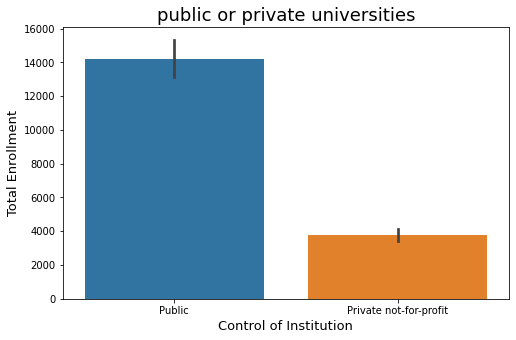

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=newDf,x='Control of institution',y='TotalEnrollment')
plt.title('public or private universities',size=18)
plt.xlabel('Control of Institution',size=13)
plt.ylabel('Total Enrollment',size=13)
plt.show()

Conclustion:-Students has prepferd Public university

## #Do students prefer universities with low tuition and fees?

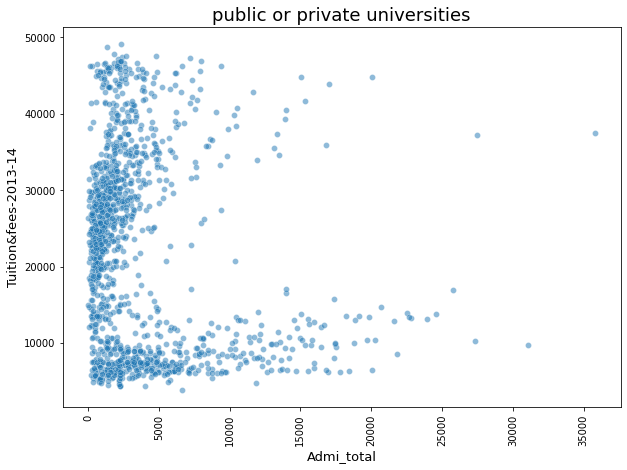

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=newDf,x='Admi_total',y='Tuition&fees-2013-14',alpha=0.5)
#sns.scatterplot(data=newDf,x='totalPriceOutStateStud2013-14',y='Admi_total',alpha=0.5,hue='Control of institution')

plt.title('public or private universities',size=18)
plt.xlabel('Admi_total',size=13)
plt.ylabel('Tuition&fees-2013-14',size=13)
plt.xticks(rotation=90)
plt.show()

Conclustion:-Yes we can say that if the fees of Institusion is less than enrollment is high.

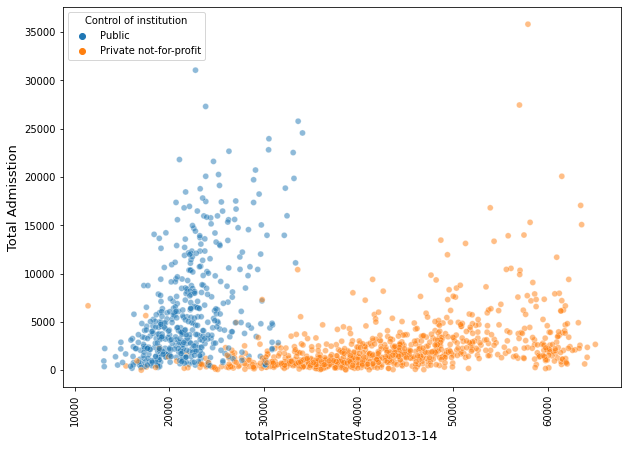

In [25]:
plt.figure(figsize=(10,7))
#sns.scatterplot(data=newDf,x='totalPriceInStateStud2013-14',y='Admi_total',alpha=0.5,hue='Control of institution')
sns.scatterplot(data=newDf,x='totalPriceInStateStud2013-14',y='Admi_total',alpha=0.5,hue='Control of institution')

#plt.title('public or private universities',size=18)
plt.xlabel('totalPriceInStateStud2013-14',size=13)
plt.ylabel('Total Admisstion',size=13)
plt.xticks(rotation=90)
plt.show()

Conclustion:-Yes we can say that if the total price of Institusion is less than enrollment is high.

## #Do students prefer universities from highly populated states?

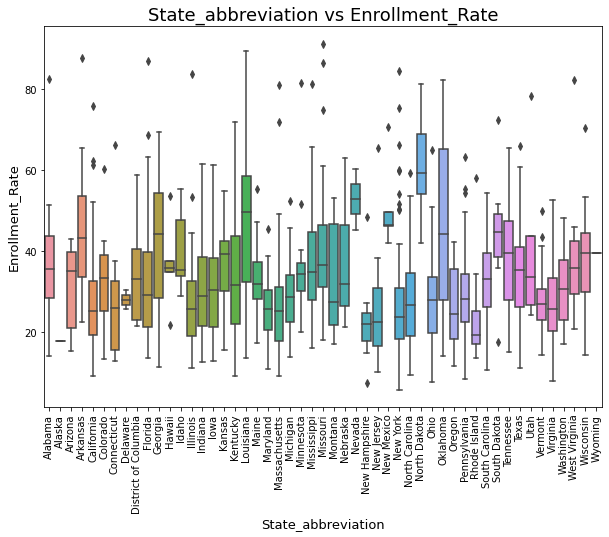

In [26]:
plt.figure(figsize=(10,7))
#sns.scatterplot(data=newDf,x='totalPriceInStateStud2013-14',y='Admi_total',alpha=0.5,hue='Control of institution')
sns.boxplot(data=newDf,x='State_abbreviation',y='Enrollment_Rate')
plt.title('State_abbreviation vs Enrollment_Rate',size=18)
plt.xlabel('State_abbreviation',size=13)
plt.ylabel('Enrollment_Rate',size=13)
plt.xticks(rotation=90)
plt.show()

## #Do students prefer a university based on the possibility of a higher, additional academic degree in the same university

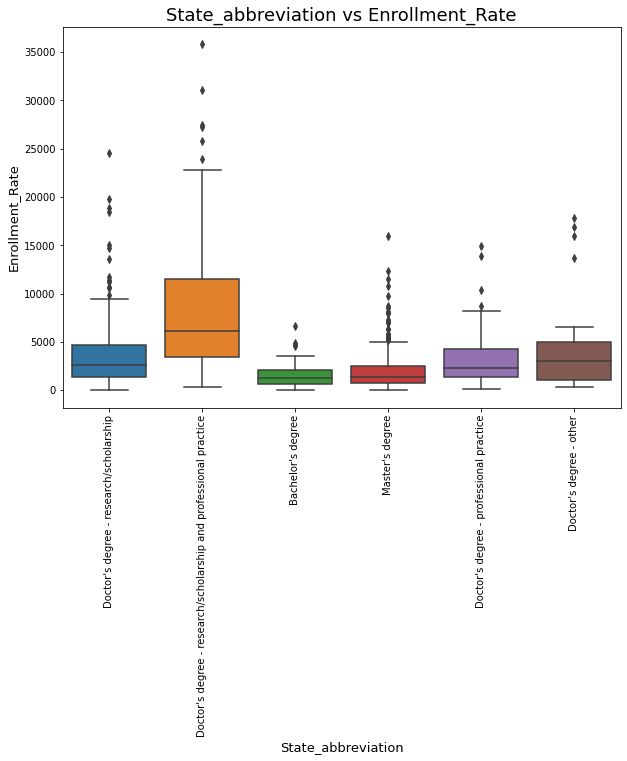

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(data=newDf,y='Admi_total',x='Highest degree offered')
plt.title('State_abbreviation vs Enrollment_Rate',size=18)
plt.xlabel('State_abbreviation',size=13)
plt.ylabel('Enrollment_Rate',size=13)
plt.xticks(rotation=90)
plt.show()

Conclusion:- We can say  students prefer a university based on the possibility of a higher, additional academic degree in the same university

In [28]:
newDf.corr()

,App_total,Admi_total,Enroll_total,NoStudRecAssDegree,NoStudRecBachDegree,NoStudRecMasterDegree,NoStudRecDocterDegree,NOStudfor1yrCerti,NoOfStudLess4Certi,NoStudPostMasterCerti,...,PFRecAnyFinancialAid,StudLoan,RecAnyFederalLoan,AnyotherLoan,TotalEnrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Enrollment_Rate
App_total,1.000000,0.852963,0.783684,0.030459,0.789559,0.712397,0.701597,0.175926,0.122767,0.300865,...,-0.525083,-0.465525,-0.458997,-0.151232,0.783377,0.821954,0.466415,0.744320,0.727828,-0.078784
Admi_total,0.852963,1.000000,0.883683,0.054253,0.842407,0.588310,0.584324,0.238067,0.159238,0.266664,...,-0.386464,-0.342490,-0.332892,-0.103072,0.815084,0.847408,0.508933,0.827181,0.622819,-0.177838
Enroll_total,0.783684,0.883683,1.000000,0.125198,0.945720,0.655995,0.658510,0.262507,0.175230,0.277574,...,-0.437405,-0.428836,-0.418685,-0.170612,0.935899,0.965080,0.608375,0.951549,0.710650,0.109579
NoStudRecAssDegree,0.030459,0.054253,0.125198,1.000000,0.120750,0.097226,0.026082,0.070826,0.174572,0.053648,...,-0.017114,-0.043164,-0.036774,-0.059626,0.171947,0.114565,0.301600,0.186892,0.099786,0.163828
NoStudRecBachDegree,0.789559,0.842407,0.945720,0.120750,1.000000,0.703530,0.648933,0.253938,0.138108,0.307266,...,-0.444740,-0.442843,-0.432068,-0.191304,0.964331,0.972777,0.692271,0.976625,0.742008,0.092303
NoStudRecMasterDegree,0.712397,0.588310,0.655995,0.097226,0.703530,1.000000,0.768829,0.179108,0.175036,0.546074,...,-0.383072,-0.396371,-0.387380,-0.157036,0.807719,0.774572,0.701533,0.686331,0.957285,0.091279
NoStudRecDocterDegree,0.701597,0.584324,0.658510,0.026082,0.648933,0.768829,1.000000,0.200659,0.179390,0.399195,...,-0.364704,-0.387129,-0.382024,-0.118704,0.716606,0.755054,0.417101,0.605256,0.858618,0.082683
NOStudfor1yrCerti,0.175926,0.238067,0.262507,0.070826,0.253938,0.179108,0.200659,1.000000,0.089763,0.120661,...,-0.079082,-0.059310,-0.056497,-0.011187,0.245624,0.259603,0.140543,0.247108,0.193197,0.023876
NoOfStudLess4Certi,0.122767,0.159238,0.175230,0.174572,0.138108,0.175036,0.179390,0.089763,1.000000,0.184118,...,-0.067985,-0.069884,-0.066833,-0.044077,0.195141,0.169481,0.222891,0.177017,0.202708,0.068524
NoStudPostMasterCerti,0.300865,0.266664,0.277574,0.053648,0.307266,0.546074,0.399195,0.120661,0.184118,1.000000,...,-0.177695,-0.194661,-0.189551,-0.054748,0.402803,0.360395,0.428141,0.318317,0.538461,0.044579
